# Ejercicio Práctico 1: Modelos de Difusión (Stable Diffusion)
Este notebook muestra cómo generar imágenes a partir de texto usando `diffusers`.

## 1. Instalación
```bash
!pip install diffusers transformers accelerate safetensors matplotlib --quiet
```

In [6]:
!pip install diffusers transformers accelerate safetensors matplotlib --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Importar librerías y configurar dispositivo

In [7]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


## 3. Carga del Pipeline

In [8]:
pipeline = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
    safety_checker=None
).to(device)
pipeline.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


## 4. Definir función de generación

In [9]:
def generate_image(prompt, guidance_scale=7.5, steps=50, seed=None):
    generator = torch.Generator(device).manual_seed(seed) if seed is not None else None
    return pipeline(
        prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=steps,
        generator=generator
    ).images[0]

## 4.1 Explicación de Parámetros Principales

- **guidance_scale**: Controla qué tanto la imagen sigue el prompt
  - Valores bajos (1-3): Más creatividad, menos fidelidad al prompt
  - Valores medios (7-8): Balance entre creatividad y fidelidad
  - Valores altos (12+): Mayor fidelidad al prompt, menos variación

- **steps**: Número de pasos de difusión
  - 20 steps: Generación rápida, menos detalle
  - 50 steps: Balance entre velocidad y calidad
  - 100 steps: Máximo detalle, más tiempo de generación

- **seed**: Semilla para reproducibilidad
  - Mismo seed = misma imagen base
  - Útil para comparar efectos de otros parámetros

## 5. Pruebas de generación

  0%|          | 0/50 [00:00<?, ?it/s]

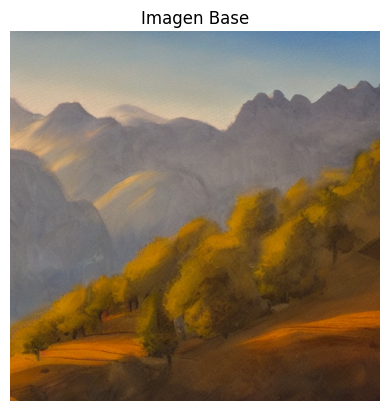

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

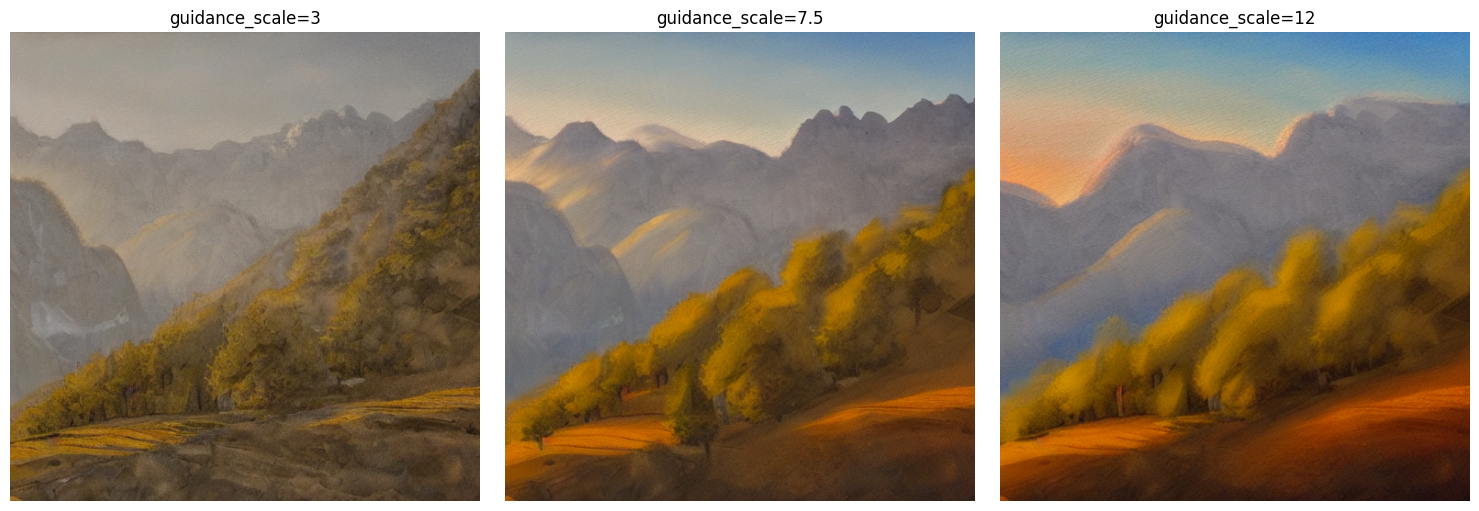

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

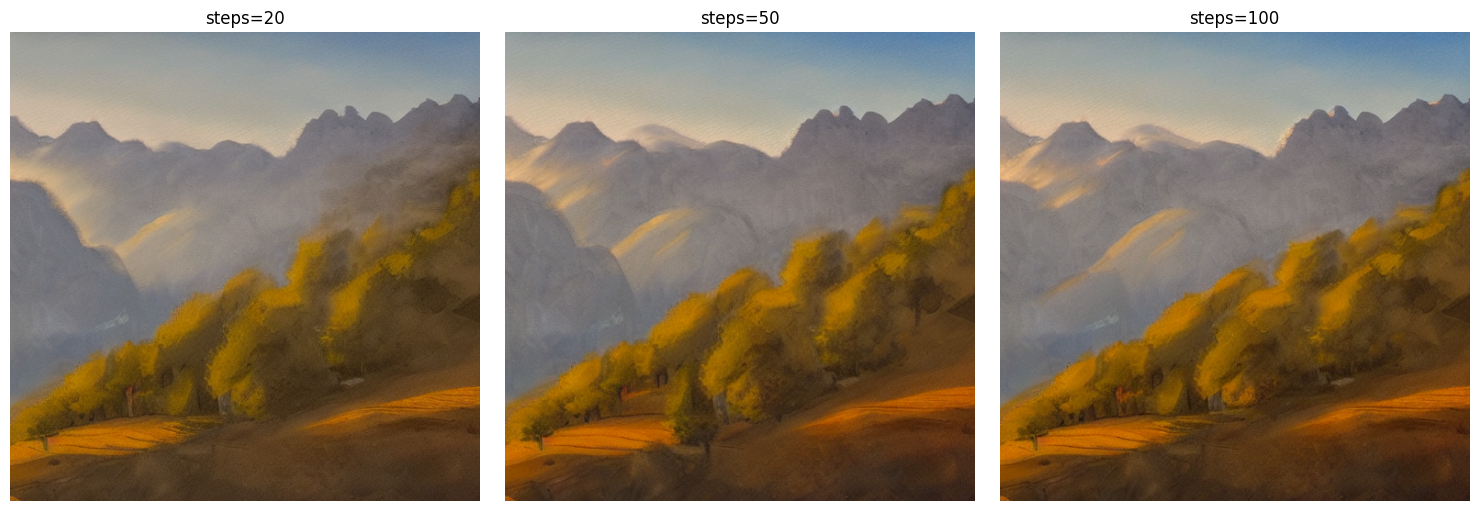

In [10]:
# Lista de prompts para experimentar
prompts = [
    "Un robot dibujando en estilo cyberpunk",
    "Una casa de campo al atardecer, estilo impresionista",
    "Un gato jugando con lana, estilo anime"
]

# Base image con prompt más elaborado
prompt_base = "Un paisaje de montaña al amanecer, con niebla en el valle y picos nevados, estilo pintura al óleo"
img = generate_image(prompt_base, seed=42)
plt.imshow(img); plt.axis('off')
plt.title("Imagen Base"); plt.show()

# Comparativa de guidance_scale
plt.figure(figsize=(15, 5))
for i, gs in enumerate([3, 7.5, 12]):
    plt.subplot(1, 3, i+1)
    img = generate_image(prompt_base, guidance_scale=gs, seed=42)
    plt.imshow(img)
    plt.title(f"guidance_scale={gs}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Comparativa de steps
plt.figure(figsize=(15, 5))
for i, st in enumerate([20, 50, 100]):
    plt.subplot(1, 3, i+1)
    img = generate_image(prompt_base, steps=st, seed=42)
    plt.imshow(img)
    plt.title(f"steps={st}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 6. Experimentación
- Cambiar prompt
- Probar seed
- Ajustar parámetros